<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project9_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Project

## Field description
1. Province_State - The name of the State within the USA.
2. Country_Region - The name of the Country (US).
3. Last_Update - The most recent date the file was pushed.
4. Lat - Latitude.
5. Long_ - Longitude.
6. Confirmed - Aggregated confirmed case count for the state.
7. Deaths - Aggregated Death case count for the state.
8. Recovered - Aggregated Recovered case count for the state.
9. Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
10. FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
11. Incident_Rate - confirmed cases per 100,000 persons.
12. People_Tested - Total number of people who have been tested.
13. People_Hospitalized - Total number of people hospitalized.
14. Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
16. UID - Unique Identifier for each row entry.
16. ISO3 - Officialy assigned country code identifiers.
17. Testing_Rate - Total number of people tested per 100,000 persons.
18. Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

## Importing Libraries

In [219]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import the BaseEstimator
from sklearn.base import BaseEstimator

import joblib

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/COVID_19_Datasets/master/csse_covid_19_daily_reports_us.csv')
df = data.copy()
df.iloc[np.r_[0:5, -5:0]]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


Observations:
1. There are some NaN values in the dataset.
2. There are categorical variables, Date variable and numeric variables.

In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 58 rows and 18 columns in the dataset.


Observations:
1. The dataset has very less number of records.

In [4]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Observations:
1. The Lat, Long_, Incident_Rate, People_Tested, Mortality_Rate and Testing_Rate have less than 3 missing values in each.
2. The Recovered variable has 16 missing values.
3. The People_Hospitalized and Hospitalization_Rate varaibles have 25 missing values in each.

Number of unique values in the Variables

In [5]:
for col in df.columns:
  print(f"There are {df[col].nunique()} unique values in {col} variable.")

There are 58 unique values in Province_State variable.
There are 1 unique values in Country_Region variable.
There are 1 unique values in Last_Update variable.
There are 56 unique values in Lat variable.
There are 56 unique values in Long_ variable.
There are 58 unique values in Confirmed variable.
There are 56 unique values in Deaths variable.
There are 42 unique values in Recovered variable.
There are 58 unique values in Active variable.
There are 58 unique values in FIPS variable.
There are 56 unique values in Incident_Rate variable.
There are 56 unique values in People_Tested variable.
There are 33 unique values in People_Hospitalized variable.
There are 57 unique values in Mortality_Rate variable.
There are 58 unique values in UID variable.
There are 6 unique values in ISO3 variable.
There are 56 unique values in Testing_Rate variable.
There are 33 unique values in Hospitalization_Rate variable.


Observations:
1. Country_region and Last_Update variables have only one values throughout the dataset.

Unique values in each variables.

In [6]:
for col in df.columns:
  print(f"The unique values in {col} are \n{df[col].unique()}\n"+"="*50)

The unique values in Province_State are 
['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
The unique values in Country_Region are 
['US']
The unique values in Last_Update are 
['2020-05-21 02:32:54']
The unique values in Lat are 
[ 32.3182  61.3707 -14.271   33.7298  34.9697  36.1162  39.0598  41.5978
  39.3185      nan  3

Observations:
1. The dataset contains details about the Country_Region 'US'.
2. The data was last aggregated on '2020-05-21' at '02:32:54'.
3. The positive and negative values in the Lat and Long_ denotes the direction of the location.
4. There are some small numbers as well as some really big numbers in the Confirmed, Deaths, Recovered, Active, People_Tested, People_Hospitalized variables.
5. There are couple of outliers in the FIPS(88888, 99999).
6. The Incident_Rate, Mortality_Rate, Testing_Rate are for persons per 100000 people.
7. Hospitalizaation_Rate is for persons per 100 people.
8. The UID shows some outliers in the lower end of the values.(16,316, 580, 630 and 850.
9. ISO3 has 6 categories.


Outliers in UID

In [7]:
df[df['UID'] < 1000]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,21,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN
44,Puerto Rico,US,2020-05-21 02:32:54,18.2208,-66.5901,2866,125,NaN,2741.0,72,97.702058,2866.0,NaN,4.361479,630,PRI,97.702058,NaN
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN


Observations:
1. These are American Islands.

Outliers in FIPS

In [8]:
df[df['FIPS'] > 100]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


Observations:
1. These are Cruise Ships.

In [9]:
df['ISO3'].value_counts()

USA    53
GUM     1
VIR     1
ASM     1
MNP     1
PRI     1
Name: ISO3, dtype: int64

Observations:
1. The ISO3 variable has 6 categories however, USA is the most frequent and dominating. Other categories are occuring only once.

In [10]:
df[~df['ISO3'].isin(['USA'])]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,21,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN
44,Puerto Rico,US,2020-05-21 02:32:54,18.2208,-66.5901,2866,125,NaN,2741.0,72,97.702058,2866.0,NaN,4.361479,630,PRI,97.702058,NaN
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN


Observations:
1. These are the Islands.

### Statistical Analysis

In [11]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observations:
1. Since there are a good percentage of missing values in the dataset, I'll 1st impute them and then do a statistical description of the dataset.

In [12]:
df_new=df.copy()

## Data Cleaning

### Imputing Recovered

Recovered = Confirmed - Deaths - ACtives

In [14]:
df.loc[np.where(df['Recovered'].isnull())[0]]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,NaN,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,US,2020-05-21 02:32:54,33.0406,-83.6431,39801,1697,NaN,38104.0,13,374.864974,402940.0,7107.0,4.263712,84000013,USA,3795.082856,17.856335
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,4525,NaN,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN
18,Indiana,US,2020-05-21 02:32:54,39.8494,-86.2583,29274,1864,NaN,27410.0,18,434.834339,195738.0,4389.0,6.367425,84000018,USA,2907.481174,14.992826
25,Massachusetts,US,2020-05-21 02:32:54,42.2302,-71.5301,88970,6066,NaN,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,USA,7108.491647,10.000000


In [15]:
df.loc[np.where(df['Recovered'].isnull())[0]]['Confirmed'] - df.loc[np.where(df['Recovered'].isnull())[0]]['Deaths'] - df.loc[np.where(df['Recovered'].isnull())[0]]['Active']

0     0.0
2     0.0
5     0.0
9     0.0
11    0.0
12    0.0
13    0.0
17    0.0
18    0.0
25    0.0
29    0.0
31    0.0
40    0.0
43    0.0
44    0.0
54    0.0
dtype: float64

In [16]:
df_new.loc[np.where(df_new['Recovered'].isnull())[0],'Recovered'] = df.loc[np.where(df['Recovered'].isnull())[0]]['Confirmed'] - df.loc[np.where(df['Recovered'].isnull())[0]]['Deaths'] - df.loc[np.where(df['Recovered'].isnull())[0]]['Active']
df_new.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Verifying the Recovered variable.

In [17]:
df_new.loc[np.where(df['Recovered'].isnull())[0]]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,0.0,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,US,2020-05-21 02:32:54,33.0406,-83.6431,39801,1697,0.0,38104.0,13,374.864974,402940.0,7107.0,4.263712,84000013,USA,3795.082856,17.856335
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,4525,0.0,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN
18,Indiana,US,2020-05-21 02:32:54,39.8494,-86.2583,29274,1864,0.0,27410.0,18,434.834339,195738.0,4389.0,6.367425,84000018,USA,2907.481174,14.992826
25,Massachusetts,US,2020-05-21 02:32:54,42.2302,-71.5301,88970,6066,0.0,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,USA,7108.491647,10.000000


#### Latitude and Longitute

In [18]:
df[df_new['Long_']>0]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,21,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN


Only 2 locations on the Eastern direction.

In [19]:
df_new[df_new['Lat'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


Observations:
1. Per Wikipedia, the ship, Diamond Princess was quarantined in the Port of Yokohama when its passengers were infected by COVID 19. 
ref: https://en.wikipedia.org/wiki/COVID-19_pandemic_on_Diamond_Princess. Hence, considering the Latitude and Longitude of the Port of Yokohama for Diamond Princess. latitude of 35.27–00°N and a longitude of 139.38–46°E.
ref: https://en.wikipedia.org/wiki/Port_of_Yokohama
2. Per Wikipedia, the ship, Grand Princess was rerouted to San Fransisco Bay Area and was anchored offshore.
ref: https://en.wikipedia.org/wiki/COVID-19_pandemic_on_Grand_Princess. Hence, considering the Latitude and Longitute of the San Fransisco Bay area. Latitude 37.8272° N, Longitutde= 122.2913° W


In [20]:
df_new.at[df_new[df_new['Province_State'] == 'Diamond Princess'].index[0], 'Lat'] = 35.2700
df_new.at[df_new[df_new['Province_State'] == 'Diamond Princess'].index[0], 'Long_'] = 139.3846

df_new.at[df_new[df_new['Province_State'] == 'Grand Princess'].index[0], 'Lat'] = 37.8272
df_new.at[df_new[df_new['Province_State'] == 'Grand Princess'].index[0], 'Long_'] = -122.2913

In [21]:
df_new[df['Lat'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


In [22]:
df_new.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Observations:
1. The Incident_Rate and People_Tested have two missing values. The above results while filling Latitude and Longitute shows that both Diamond Princess and Grand Princess have NaN in Incident_Rate and People_Tested.

#### Incident_Rate and People_Tested

In [23]:
df_new[df['Incident_Rate'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


In [24]:
df_new[df['People_Tested'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


Observations:
1. Incident_Rate and People_Tested are missing for Diamond Princess and Grand Princess.
2. Since these are ships, we can confidently say that all the people who were onboard would have been tested.
3. So, need to find the number of crew members and passengers on the ship during the pandemic.

Intuitions:
1. The Incident_Rate is the "confirmed cases per 100,000 persons".

2. It can be calculated using the formula:-> Incident_Rate = (Confirmed cases / Total Population)*100000.

eg: For Alabama the population around the time in May 2020 is 4921532. So the approximate incident rate is 13052/4921532 *100000 = 265.20197369436994. We are getting an approximately close value to 266.194321 in the dataset.

1. Population on Diamond Princess was 3711 and on Grand Princess was 3533.

In [25]:
print("The People_Tested for Diamond Princess is 3711")
print(f"The Incident_Rate for Diamond Princess is {round((49/3711)*100000,6)}")

The People_Tested for Diamond Princess is 3711
The Incident_Rate for Diamond Princess is 1320.398814


In [26]:
print("The People_Tested for Grand Princess is 3533")
print(f"The Incident_Rate for Grand Princess is {round((103/3533)*100000,6)}")

The People_Tested for Grand Princess is 3533
The Incident_Rate for Grand Princess is 2915.369374


In [27]:
df_new.at[df_new[df_new['Province_State'] == 'Diamond Princess'].index[0], 'People_Tested'] = 3711
df_new.at[df_new[df_new['Province_State'] == 'Diamond Princess'].index[0], 'Incident_Rate'] = 1320.398814

df_new.at[df_new[df_new['Province_State'] == 'Grand Princess'].index[0], 'People_Tested'] = 3533
df_new.at[df_new[df_new['Province_State'] == 'Grand Princess'].index[0], 'Incident_Rate'] = 2915.369374

In [28]:
df_new[df['People_Tested'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,NaN,2.912621,84099999,USA,NaN,NaN


In [29]:
df_new[df['Incident_Rate'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,NaN,2.912621,84099999,USA,NaN,NaN


In [30]:
df_new.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            0
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

#### Testing_Rate

In [31]:
df_new.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


Intuitions:
1. The Testing_Rate is the "Total number of people tested per 100,000 persons".
2. It can be calculated using the formula:-> Testing_Rate = (People_Tested / Total Population)*100000.

eg: For Alabama the population around the time in May 2020 is approximately 4921532. So the approximate Testing Rate is 164450/4921532 *100000 = 3341.4392103922114. We are getting an approximately close value to 3353.942386 in the dataset.

In [32]:
df_new[df['Testing_Rate'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,NaN,2.912621,84099999,USA,NaN,NaN


The population in Diamond Princess and Grand Princess are 3711 and 3533. Hence the Testing_Rate would be 100000.

references: 
1. https://en.wikipedia.org/wiki/COVID-19_pandemic_on_Diamond_Princess
2. https://en.wikipedia.org/wiki/COVID-19_pandemic_on_Grand_Princess


In [33]:
df_new.at[df_new[df_new['Province_State'] == 'Diamond Princess'].index[0], 'Testing_Rate'] = 100000
df_new.at[df_new[df_new['Province_State'] == 'Grand Princess'].index[0], 'Testing_Rate'] = 100000

In [34]:
df_new[df['Testing_Rate'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,NaN,0.000000,84088888,USA,100000.0,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,NaN,2.912621,84099999,USA,100000.0,NaN


#### Mortality Rate

Observations:
1. Only one row without the Mortality_Rate. Mortality_Rate is calculated by the formula (Deaths/Confirmed)*100. For eg: for Alabama,  522/13052*100 = 3.999387.
2. Since the Confirmed and Deaths is 0, the Mortality_Rate will also be 0.

In [35]:
df_new.at[df[df['Mortality_Rate'].isnull()].index[0], 'Mortality_Rate'] = 0

In [36]:
df_new.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            0
People_Hospitalized     25
Mortality_Rate           0
UID                      0
ISO3                     0
Testing_Rate             0
Hospitalization_Rate    25
dtype: int64

#### People_Hospitalized

In [37]:
df_new[df['People_Hospitalized'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,NaN,0.000000,84088888,USA,100000.000000,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,NaN,2.912621,84099999,USA,100000.000000,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,4525,0.0,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN
19,Iowa,US,2020-05-21 02:32:54,42.0115,-93.2105,15620,393,8362.0,6865.0,19,495.076179,110748.0,NaN,2.516005,84000019,USA,3510.159838,NaN


In [38]:
df_new[~df['People_Hospitalized'].isnull()].head(20)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,0.0,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,US,2020-05-21 02:32:54,33.0406,-83.6431,39801,1697,0.0,38104.0,13,374.864974,402940.0,7107.0,4.263712,84000013,USA,3795.082856,17.856335
15,Hawaii,US,2020-05-21 02:32:54,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,USA,3270.352122,12.752722
16,Idaho,US,2020-05-21 02:32:54,44.2405,-114.4788,2506,77,1668.0,761.0,16,140.229930,38567.0,215.0,3.072626,84000016,USA,2158.119598,8.579409
18,Indiana,US,2020-05-21 02:32:54,39.8494,-86.2583,29274,1864,0.0,27410.0,18,434.834339,195738.0,4389.0,6.367425,84000018,USA,2907.481174,14.992826


In [39]:
df_new[df_new['Confirmed'] < df_new['People_Hospitalized']]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate


Observations:
1. Looking at the existing 'People_Hospitalized' values, it looks like the People_Hospitalized value is always lesser than 'Confirmed' value.

Looking at the correlation of other variables with People_Hospitalized.

In [40]:
df_new.corr().T[['People_Hospitalized']].sort_values('People_Hospitalized', ascending=False)

,People_Hospitalized
People_Hospitalized,1.000000
Deaths,0.992313
Confirmed,0.989936
Active,0.976456
Recovered,0.927104
People_Tested,0.906210
Incident_Rate,0.725370
Mortality_Rate,0.509658
Hospitalization_Rate,0.377586
Testing_Rate,0.331753


Observations:
1. 'Confirmed' and 'Deaths' have high correlation with 'People_Hospitalized'.

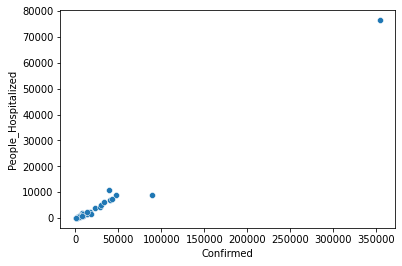

In [42]:
sns.scatterplot(df_new['Confirmed'], df_new['People_Hospitalized'])
plt.show()

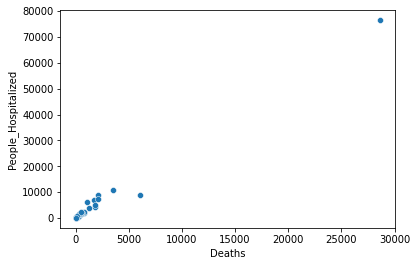

In [43]:
sns.scatterplot(df_new['Deaths'], df_new['People_Hospitalized'])
plt.show()

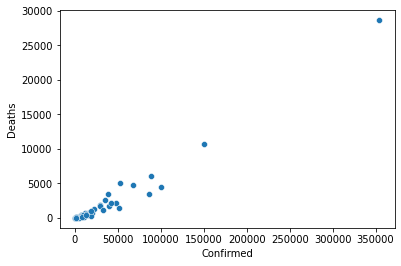

In [44]:
sns.scatterplot(df_new['Confirmed'], df_new['Deaths'])
plt.show()

Observations:
1. Shows linear relationship. Hence Linear regression can be used to predict the missing values in People_Hospitalized.

In [46]:
x = df_new[~df_new['People_Hospitalized'].isnull()][['Confirmed','Deaths']]
y=  df_new[~df_new['People_Hospitalized'].isnull()][['People_Hospitalized']]
lr = LinearRegression()
lr.fit(x,y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(r2_score(y,lr.predict(x)))
print(mean_squared_error(y,lr.predict(x)))

0.9853749750564569
2465666.3118921304


Observations:
1. Good R2 score of 0.985. Hence LinearRegression will be useful in imupting People_Hospitalized variable.

Predicting the People_Hospitalized variable's values

In [49]:
x_get = df_new[['Confirmed','Deaths']]
df_new['pred_People_Hospitalized'] = lr.predict(x_get)

In [50]:
df_new.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,1799.393812
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,100.511377
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN,58.709513
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2338.425318
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,545.885664


Checking if there are any values in the predicted People_Hospitalized greater than values in 'Confirmed'

In [51]:
df_new[df_new['Confirmed'] < df_new['pred_People_Hospitalized']]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN,58.709513
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,NaN,0.000000,84088888,USA,100000.000000,NaN,61.454021
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,21,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN,63.754071
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN,74.179249


Checking if there are any negative values in the predicted People_Hospitalized.

In [52]:
df_new[df_new['pred_People_Hospitalized'] < 0]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized


In [53]:
df_new[df_new['Confirmed'] == 0]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized
2,American Samoa,US,2020-05-21 02:32:54,-14.271,-170.132,0,0,0.0,0.0,60,0.0,124.0,NaN,0.0,16,ASM,222.857246,NaN,58.709513


Observations:
1. About 4 Predictions are greater than the 'Confirmed' values.
2. There are no negative values in the predictions.
3. There is only one record which has 'Confirmed' as 0.

Intuitions:
1. It does not make sense to have People_Hospitalized to be more than people that are confirmed of the disease.
2. As an adjustment, shift down the 'pred_People_Hospitalized' values by the min value in pred_People_Hospitalized(i.e., shift all the values in pred_People_Hospitalized down by 58.709513) to make the pred_People_Hospitalized values as 0 for the record that has 'Confirmed' as 0.

Shifting the values in the predicted People_Hospitalized by the min value in the predicted People_Hospitalized.

In [54]:
df_new['scaled_pred_People_Hospitalized'] = round(df_new['pred_People_Hospitalized'] - min(df_new['pred_People_Hospitalized']))

In [55]:
df_new.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized,scaled_pred_People_Hospitalized
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,1799.393812,1741.0
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,100.511377,42.0
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN,58.709513,0.0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2338.425318,2280.0
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,545.885664,487.0


In [56]:
df_new[df_new['Confirmed'] < df_new['scaled_pred_People_Hospitalized']]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized,scaled_pred_People_Hospitalized


Observations:
1. Now there wont be any hospitalized people more than confirmed.

Fill missing values in People_Hospitalized using the values in pred_People_Hospitalized variable.

In [57]:
processed_data = df_new.drop(['pred_People_Hospitalized','scaled_pred_People_Hospitalized'], axis=1).copy()
processed_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [58]:
indexes = np.where(processed_data['People_Hospitalized'].isnull())

In [59]:
processed_data.loc[indexes[0],'People_Hospitalized'] = df_new.loc[indexes[0],'scaled_pred_People_Hospitalized']

In [60]:
processed_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [61]:
df_new.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,pred_People_Hospitalized,scaled_pred_People_Hospitalized
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,1799.393812,1741.0
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,100.511377,42.0
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN,58.709513,0.0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2338.425318,2280.0
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,545.885664,487.0


Verifying the imputed values

In [62]:
processed_data[df['People_Hospitalized'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,11581.0,4.066421,84000006,USA,3492.893832,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,1059.0,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,3.0,0.000000,84088888,USA,100000.000000,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,1210.0,5.390015,84000011,USA,5727.106946,NaN
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,12.0,2.912621,84099999,USA,100000.000000,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,18.0,3.246753,316,GUM,3027.479921,NaN
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,4525,0.0,95893.0,17,792.451219,642713.0,14377.0,4.506164,84000017,USA,5071.986102,NaN
19,Iowa,US,2020-05-21 02:32:54,42.0115,-93.2105,15620,393,8362.0,6865.0,19,495.076179,110748.0,1635.0,2.516005,84000019,USA,3510.159838,NaN


Observations:
1. The People_Hospitalized variable is cleaned. 
2. There are missing values in the 'Hospitalization_Rate'.

#### Hospitalization_Rate

1. The Hospitalization_Rate is given by (People_Hospitalized/Confirmed) *100

In [63]:
indexes = np.where(processed_data['Hospitalization_Rate'].isnull())

In [64]:
processed_data.loc[indexes[0],'Hospitalization_Rate'] = (processed_data.loc[indexes[0], 'People_Hospitalized']/processed_data.loc[indexes[0], 'Confirmed']) * 100

In [65]:
processed_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,USA,5063.940017,10.473815
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [66]:
processed_data[df['Hospitalization_Rate'].isnull()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,USA,5063.940017,10.473815
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,11581.0,4.066421,84000006,USA,3492.893832,13.466749
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,1059.0,3.783256,84000010,USA,4663.552976,12.924091
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,3.0,0.000000,84088888,USA,100000.000000,6.122449
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,1210.0,5.390015,84000011,USA,5727.106946,16.024368
13,Grand Princess,US,2020-05-21 02:32:54,37.8272,-122.2913,103,3,0.0,100.0,99999,2915.369374,3533.0,12.0,2.912621,84099999,USA,100000.000000,11.650485
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,18.0,3.246753,316,GUM,3027.479921,11.688312
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,4525,0.0,95893.0,17,792.451219,642713.0,14377.0,4.506164,84000017,USA,5071.986102,14.317154
19,Iowa,US,2020-05-21 02:32:54,42.0115,-93.2105,15620,393,8362.0,6865.0,19,495.076179,110748.0,1635.0,2.516005,84000019,USA,3510.159838,10.467350


Observations:
1. The record with Confirmed and People_Hospitalized as 0 is still NaN probably due to the dividebyzero error.
2. Update it as 0 manually.

In [67]:
processed_data['Hospitalization_Rate'].fillna(0,axis=0,inplace=True)

In [68]:
processed_data[df['Hospitalization_Rate'].isnull()].head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,USA,5063.940017,10.473815
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,11581.0,4.066421,84000006,USA,3492.893832,13.466749
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,1059.0,3.783256,84000010,USA,4663.552976,12.924091
9,Diamond Princess,US,2020-05-21 02:32:54,35.2700,139.3846,49,0,0.0,49.0,88888,1320.398814,3711.0,3.0,0.000000,84088888,USA,100000.000000,6.122449


## Statistical Description

In [69]:
processed_data.describe(include='all')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58,58.000000,58.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,New Jersey,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.830038,-81.973743,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,455.598160,2.181903e+05,4648.000000,4.381382,7.676194e+07,NaN,7208.180426,14.356660
std,NaN,NaN,NaN,10.697145,57.332990,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,528.389694,2.963314e+05,10872.946624,2.195667,2.378302e+07,NaN,17790.796674,5.173393
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.240000e+02,0.000000,0.000000,1.600000e+01,NaN,97.702058,0.000000
25%,NaN,NaN,NaN,34.872800,-103.929325,2596.000000,74.000000,0.000000,812.500000,18.250000,154.909239,4.166725e+04,256.500000,2.952622,8.400001e+07,NaN,2741.843521,10.754691
50%,NaN,NaN,NaN,38.978600,-87.944200,10148.500000,385.000000,1079.500000,5644.500000,32.500000,259.009335,1.334500e+05,1465.000000,4.382399,8.400003e+07,NaN,3501.526835,14.064950
75%,NaN,NaN,NaN,42.214075,-76.858275,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,521.859755,2.620348e+05,4995.750000,5.450908,8.400004e+07,NaN,5069.974581,17.610998


Observations:

1. There are no missing values in the dataset now.
2. The 'Country_Region', 'Last_Update' has only 1 unique value throughout the dataset. This consolidated data is taken on 21st May 2020 in US.
3. The Province_State has the states of the US and couple of ships.
4. Lat and Long_ gives the latitudinal and Longitudinal locations of the states.
5. The Confirmed variable ranges from 0 to 354370. It is right skewed. At least 75% of the Provinces show greater than at least 2500 confirmed Covid 19 cases.
6. The Deaths variable ranges from 0 to 28636. It is right skewed.
7. The Recovered variable ranges from 0 to 61886. At least 25% of the records have 0 as the Recovered value. It is right skewed.
8. The Active variable ranges from 0 to 263848. It is right skewed.
9. FIPS ranges from 1 to 99999. 
10. Incident_Rate ranges from 0 to 2915. It is right skewed. At least 50% of the records have incident rate between 150 to 521.
11. People_Tested ranges from 124 to 1505836. It is rigth skewed. At least 50% of the states have tested more than at least 133450 people.
12. People_Hospitalized ranges from 0 to 76410. In At least 50% of the states, more than 1465 people have been hospitalized. It is positively skewed.
13. The Mortality_Rate ranges from 0% to 9.55%. The sitribution is close to normal. In at least 75% of the states, the Mortality_Rate is greater than 2.9%. 
14. UID is a unique identifier for each record. ranges from 16 to 84100000 however, there are only 58 UIDs.
15. ISO has 6 categories. USA is the most frequent occuring 53 times in the dataset out of 58 records. USA is the domiating category.
16. Testing_Rate ranges from 97.7 to 100000. It is right skewed. Atleast 75% of the states have tested less than 5069 people per 100000 persons. The cruise ships have tested the entire population onboard. It is right skewed.
17. Hospitalization_Rate ranges from 0% to 28.05%. At least 10% of the confirmed cases are hospitalized in at least 75% of the States. It is close to normal.




In [70]:
for col in processed_data.columns:
  print(f"Unique numbers in {col} is {processed_data[col].nunique()}")

Unique numbers in Province_State is 58
Unique numbers in Country_Region is 1
Unique numbers in Last_Update is 1
Unique numbers in Lat is 58
Unique numbers in Long_ is 58
Unique numbers in Confirmed is 58
Unique numbers in Deaths is 56
Unique numbers in Recovered is 43
Unique numbers in Active is 58
Unique numbers in FIPS is 58
Unique numbers in Incident_Rate is 58
Unique numbers in People_Tested is 58
Unique numbers in People_Hospitalized is 58
Unique numbers in Mortality_Rate is 57
Unique numbers in UID is 58
Unique numbers in ISO3 is 6
Unique numbers in Testing_Rate is 57
Unique numbers in Hospitalization_Rate is 58


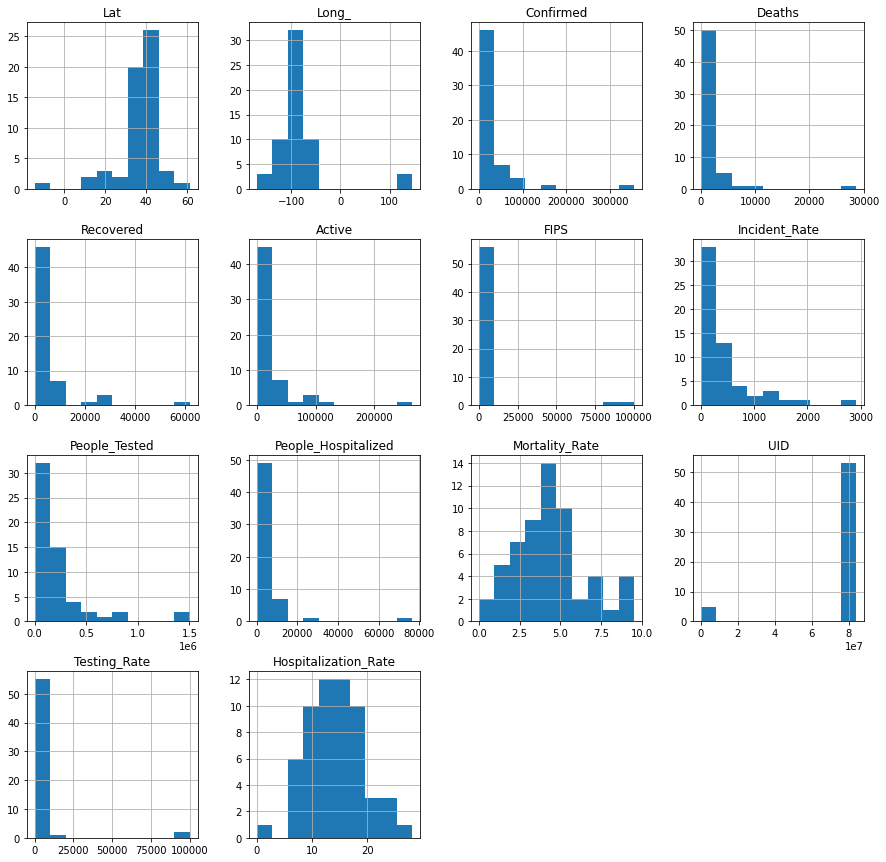

In [72]:
processed_data.hist(figsize=(15,15))
plt.show()

Observations:
1. There are outliers in the data. I will investigate it further and treat it if required.

## Data Analysis

### Univariate Analysis

Confirmed cases

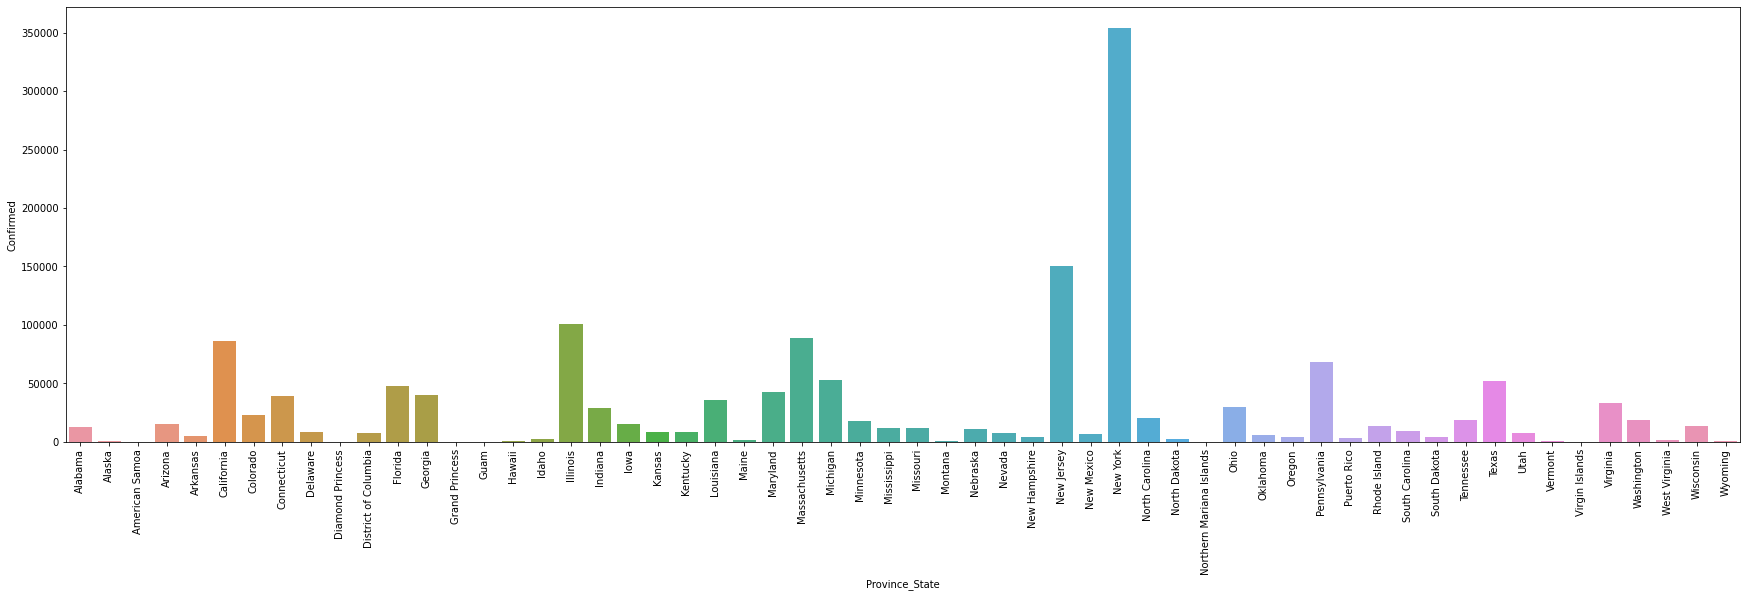

In [73]:
plt.figure(figsize=(30,8))
sns.barplot(x =processed_data['Province_State'] ,y=processed_data['Confirmed'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. New York has the highest Confirmed cases.
2. There are many provinces that have very low cases. However it also depends on the population in that province to see how bad the number of cases are.

Incident Rate

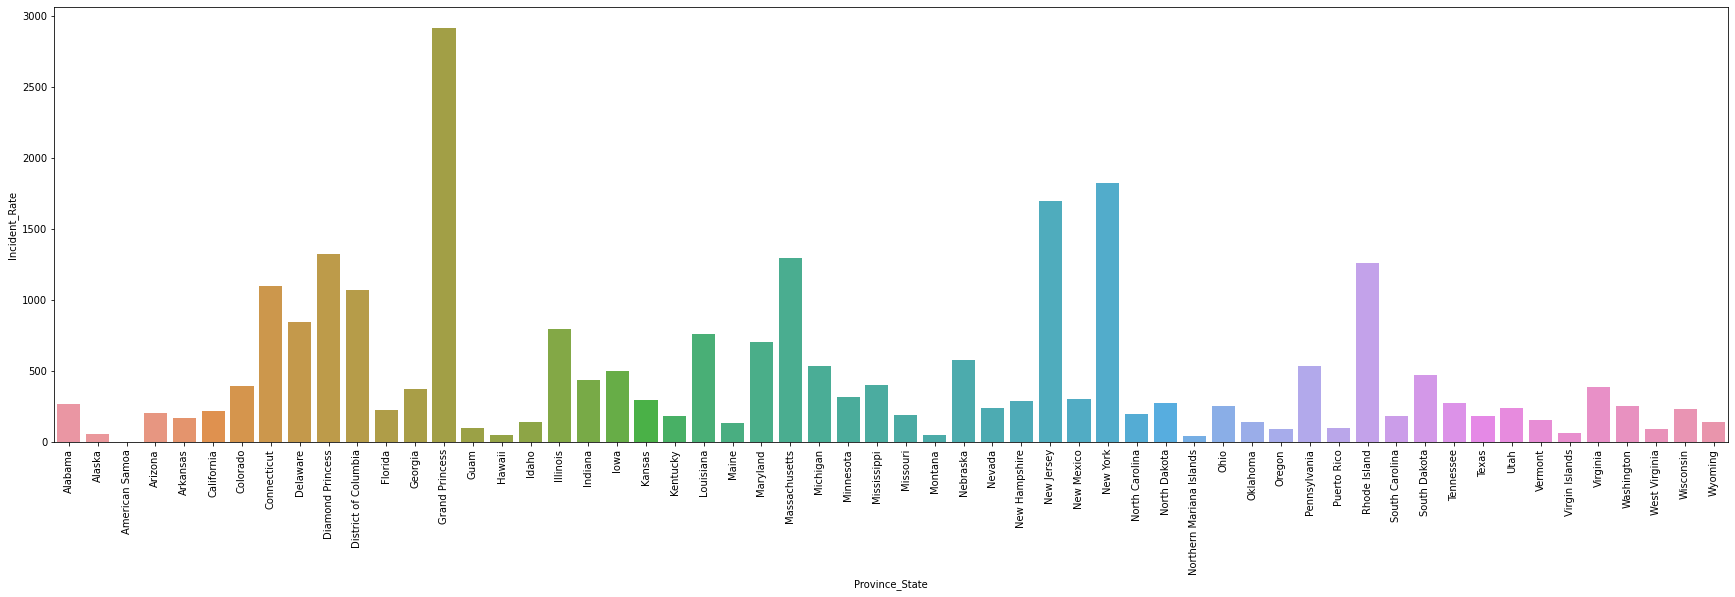

In [74]:
plt.figure(figsize=(30,8))
sns.barplot(x =processed_data['Province_State'] ,y=processed_data['Incident_Rate'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. Here we can see that the Grand Prince had a very bad spread. The incident rate indicates that almost close to 3000 persons per 100000 people are infected. It is a cruise ship, the population is pretty low and the province is a enclosed vessel. Hence the incident rate is quite high.
2. New York is still in the place.
3. The interesting fact is that Diamond Proncess, another cruise ship, a close vessel is only at the 4th position with respect to the Incident rate. This indicates that, strong measures have been taken in the Diamond Princess ship to prevent the spread of the disease despite the adverse conditions compared to New York and New Jersey.
4. American Samoa, the group of islands have the lowest Incident Rate. This should be probably because they are secluded from the other states in the US.

Deaths

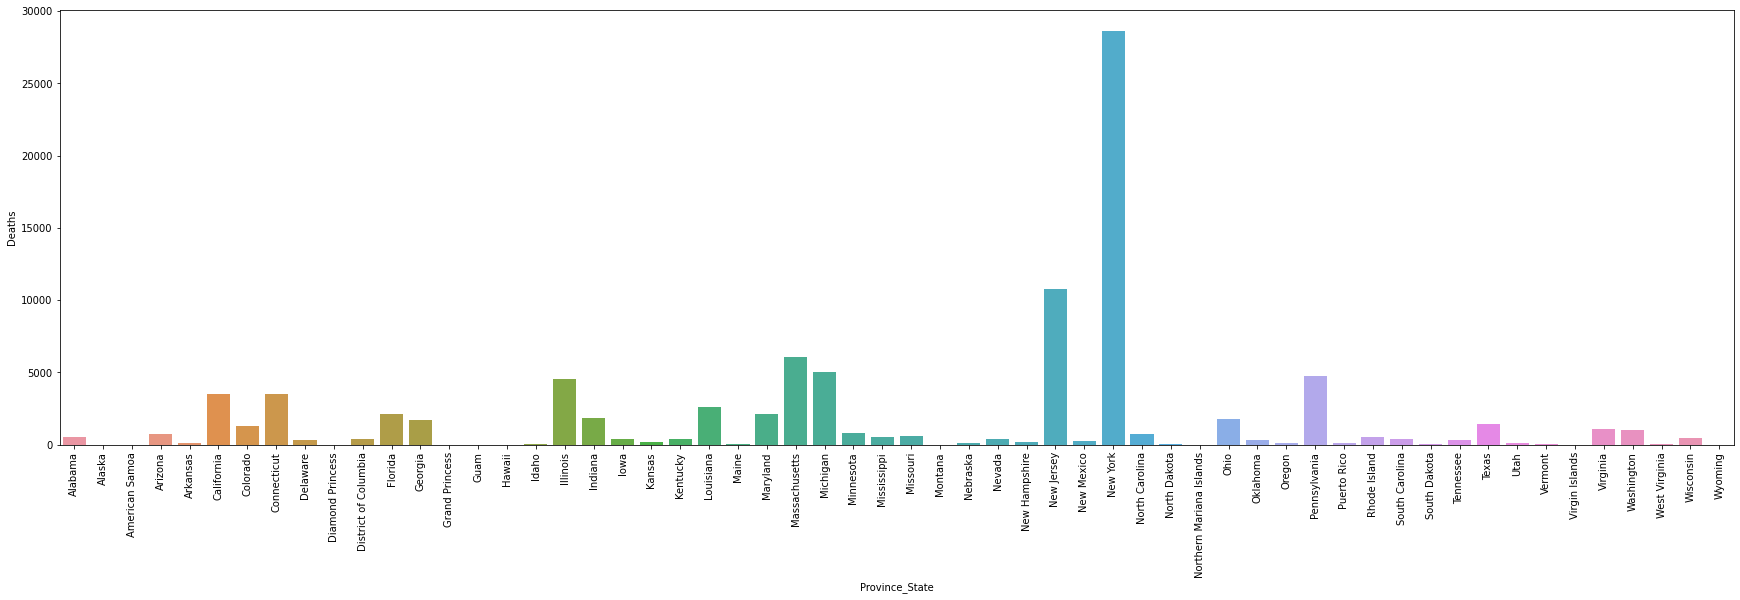

In [75]:
plt.figure(figsize=(30,8))
sns.barplot(x =processed_data['Province_State'] ,y=processed_data['Deaths'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. New York shows tha maximum number of deaths due to Covid 19 followed by New Jersey.

Mortality_Rate

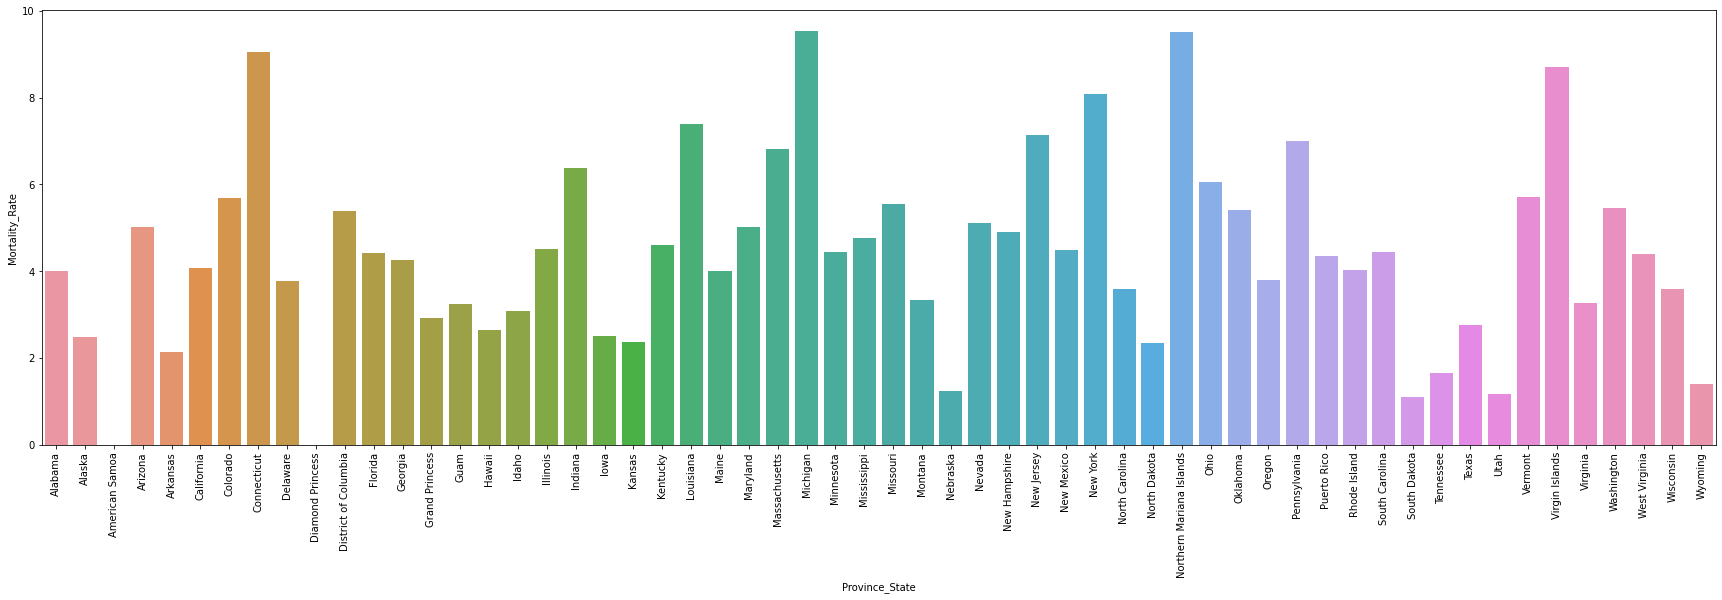

In [76]:
plt.figure(figsize=(30,8))
sns.barplot(x =processed_data['Province_State'] ,y=processed_data['Mortality_Rate'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. Although New York had the highest number of deaths, Michigan's data shows that the most percentage of death in the confirmed cases is from Michigan and very closely followed by New York.
2. Since the Incident rate was pretty low in Diamond Princess the chance for death is also pretty low and it is reflecting in the graph above. The ssme case is applicable in American Samoa.

Incident_Rate in each ISO3 categories

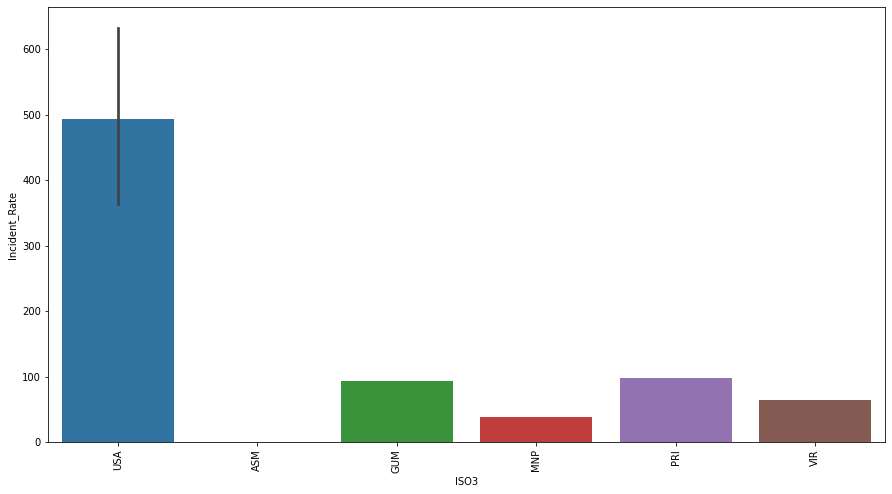

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(x =processed_data['ISO3'] ,y=processed_data['Incident_Rate'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. The incident rate is the highest in the USA and the least in American Samoa Islands.

Mortality_Rate in each ISO3 categories

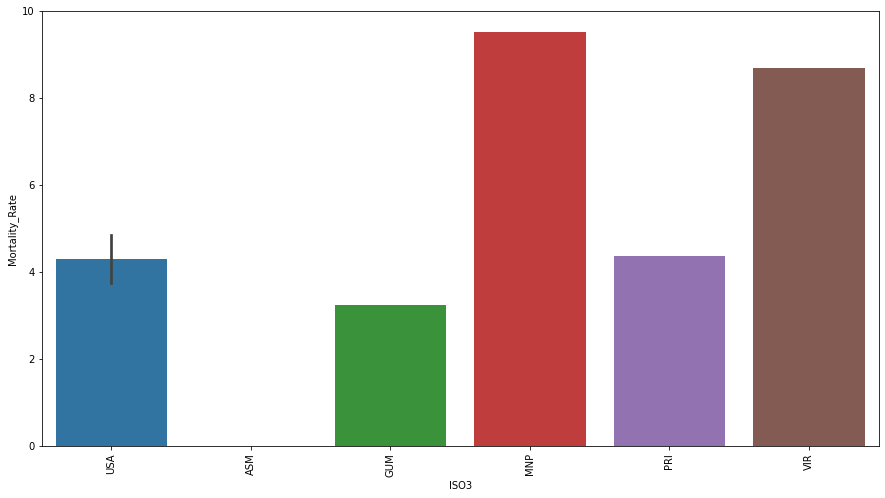

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(x =processed_data['ISO3'] ,y=processed_data['Mortality_Rate'])
plt.xticks(rotation=90)
plt.show()

Observations:
1. American Samoa has the lowest Mortality rate.
2. Northern Marina Islands have the most Mortality rate even though the incident rate the lowest for Northern Marina Islands. It is followed by the US Virgin Islands.
3. USA comes only in the 4th place in Mortality rate among this combination with a confidence interval of 95% even though it has the highest Incident rate.

### Multivariate Analysis

In [79]:
cn = processed_data[['Province_State','Confirmed','Deaths','Recovered','Active']].sort_values(by='Confirmed',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Confirmed,Deaths,Recovered,Active
36,New York,354370,28636,61886.000000,263848.000000
34,New Jersey,150776,10749,23945.000000,116082.000000
17,Illinois,100418,4525,0.000000,95893.000000
25,Massachusetts,88970,6066,0.000000,82904.000000
5,California,85997,3497,0.000000,82500.000000
13,Grand Princess,103,3,0.000000,100.000000
52,Virgin Islands,69,6,61.000000,2.000000
9,Diamond Princess,49,0,0.000000,49.000000
39,Northern Mariana Islands,21,2,13.000000,6.000000
2,American Samoa,0,0,0.000000,0.000000


Observations:
1. The most Confirmed cases are in New York and the least is in American Samoa.

In [ ]:
cn = processed_data[['Province_State','Confirmed','Deaths','Recovered','Active']].sort_values(by='Recovered',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Confirmed,Deaths,Recovered,Active
36,New York,354370,28636,61886.000000,263848.000000
49,Texas,51673,1426,30341.000000,19906.000000
26,Michigan,53009,5060,28234.000000,19715.000000
22,Louisiana,35316,2608,26249.000000,6459.000000
34,New Jersey,150776,10749,23945.000000,116082.000000
11,Florida,47471,2096,0.000000,45375.000000
9,Diamond Princess,49,0,0.000000,49.000000
5,California,85997,3497,0.000000,82500.000000
2,American Samoa,0,0,0.000000,0.000000
29,Missouri,11528,640,0.000000,10888.000000


Observations:
1. The most number of Recovered cases is also in New York.
2. In Missouri there are 0 cases recovered however, there are Deaths in Missouri.

In [80]:
cn = processed_data[['Province_State','Confirmed','Deaths','Recovered','Active']].sort_values(by='Deaths',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Confirmed,Deaths,Recovered,Active
36,New York,354370,28636,61886.000000,263848.000000
34,New Jersey,150776,10749,23945.000000,116082.000000
25,Massachusetts,88970,6066,0.000000,82904.000000
26,Michigan,53009,5060,28234.000000,19715.000000
43,Pennsylvania,68126,4770,0.000000,63356.000000
14,Guam,154,5,125.000000,24.000000
13,Grand Princess,103,3,0.000000,100.000000
39,Northern Mariana Islands,21,2,13.000000,6.000000
9,Diamond Princess,49,0,0.000000,49.000000
2,American Samoa,0,0,0.000000,0.000000


Observations:
1. Maccachusetts and Pennsylvania are also showing a unfortunately a good number of Deaths and 0 recovered case. 

In [81]:
cn = processed_data[['Province_State','Confirmed','Deaths','Recovered','Active']].sort_values(by='Active',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Confirmed,Deaths,Recovered,Active
36,New York,354370,28636,61886.000000,263848.000000
34,New Jersey,150776,10749,23945.000000,116082.000000
17,Illinois,100418,4525,0.000000,95893.000000
25,Massachusetts,88970,6066,0.000000,82904.000000
5,California,85997,3497,0.000000,82500.000000
14,Guam,154,5,125.000000,24.000000
30,Montana,478,16,440.000000,22.000000
39,Northern Mariana Islands,21,2,13.000000,6.000000
52,Virgin Islands,69,6,61.000000,2.000000
2,American Samoa,0,0,0.000000,0.000000


Observations:
1. There are large number of Active cases in New York still.

In [83]:
cn = processed_data[['Province_State','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate']].sort_values(by='Incident_Rate',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate
13,Grand Princess,2915.369374,2.912621,100000.000000,11.650485
36,New York,1821.620216,8.080819,7740.670204,21.562209
34,New Jersey,1697.509285,7.129119,5982.117023,19.389691
9,Diamond Princess,1320.398814,0.000000,100000.000000,6.122449
25,Massachusetts,1290.822797,6.818029,7108.491647,10.000000
1,Alaska,54.815493,2.493766,5063.940017,10.473815
15,Hawaii,45.413710,2.643857,3270.352122,12.752722
30,Montana,44.723974,3.347280,2781.307250,13.598326
39,Northern Mariana Islands,38.082112,9.523810,6921.877267,23.809524
2,American Samoa,0.000000,0.000000,222.857246,0.000000


Observations:
1. The Incident_Rate os highest in GrandPrincess since its a closed vessel.
2. The Mortality_Rate is lower than New york.

In [84]:
cn = processed_data[['Province_State','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate']].sort_values(by='Testing_Rate',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,1320.398814,0.000000,100000.000000,6.122449
13,Grand Princess,2915.369374,2.912621,100000.000000,11.650485
45,Rhode Island,1260.760024,4.028152,11377.424693,11.126086
38,North Dakota,274.912015,2.338902,7768.396797,6.778043
36,New York,1821.620216,8.080819,7740.670204,21.562209
3,Arizona,204.788838,5.011405,2272.859351,12.022005
16,Idaho,140.229930,3.072626,2158.119598,8.579409
52,Virgin Islands,64.324869,8.695652,1289.294104,21.739130
2,American Samoa,0.000000,0.000000,222.857246,0.000000
44,Puerto Rico,97.702058,4.361479,97.702058,14.026518


Observations:
1. Although the number of Confirmed cases are the highest in New Your, the Testing_Rate is only at the 4th place.

In [85]:
cn = processed_data[['Province_State','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate']].sort_values(by='Hospitalization_Rate',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate
7,Connecticut,1094.357902,9.044775,5349.302875,28.054438
21,Kentucky,182.802099,4.603894,3446.671231,24.611240
26,Michigan,530.787614,9.545549,4376.471997,24.063838
39,Northern Mariana Islands,38.082112,9.523810,6921.877267,23.809524
52,Virgin Islands,64.324869,8.695652,1289.294104,21.739130
31,Nebraska,574.956266,1.240784,3729.047853,8.002158
47,South Dakota,472.159329,1.101269,3435.108895,7.972229
38,North Dakota,274.912015,2.338902,7768.396797,6.778043
9,Diamond Princess,1320.398814,0.000000,100000.000000,6.122449
2,American Samoa,0.000000,0.000000,222.857246,0.000000


Observations:
1. Interestingly, The Hospitalization Rate and the Mortality Rate in Connecticust is higher than New York although the incident Rate is pretty low compared to New York. May be there are many elderly Citizens in Connecticut.

In [ ]:
cn = processed_data[['Province_State','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate']].sort_values(by='Mortality_Rate',ascending=False).iloc[np.r_[0:5, -5:0]]
cn.style.bar()

,Province_State,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate
26,Michigan,530.787614,9.545549,4376.471997,24.063838
39,Northern Mariana Islands,38.082112,9.523810,6921.877267,23.809524
7,Connecticut,1094.357902,9.044775,5349.302875,28.054438
52,Virgin Islands,64.324869,8.695652,1289.294104,21.739130
36,New York,1821.620216,8.080819,7740.670204,21.562209
31,Nebraska,574.956266,1.240784,3729.047853,8.002158
50,Utah,240.489738,1.167315,5604.065930,8.184176
47,South Dakota,472.159329,1.101269,3435.108895,7.972229
9,Diamond Princess,1320.398814,0.000000,100000.000000,6.122449
2,American Samoa,0.000000,0.000000,222.857246,0.000000


Observations:
1. Michigan has the highest Mortality Rate and the 3rd highest Hospitalization Rate. The incident Rate is pretty low.
2. It could be that mostly elder citizens are affected in Michigan.

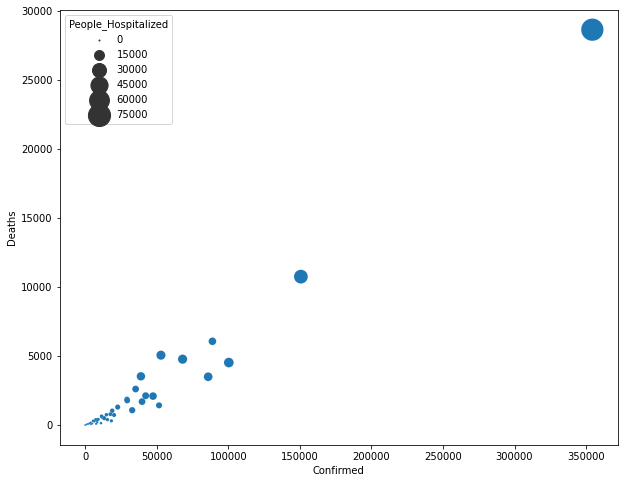

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Confirmed',y= 'Deaths', data=processed_data,size='People_Hospitalized', sizes=(1,500))

Observations:
1. More the confirmed cases, more the Hospitalizations and more the deaths. The three variables seem to be positively correlated.

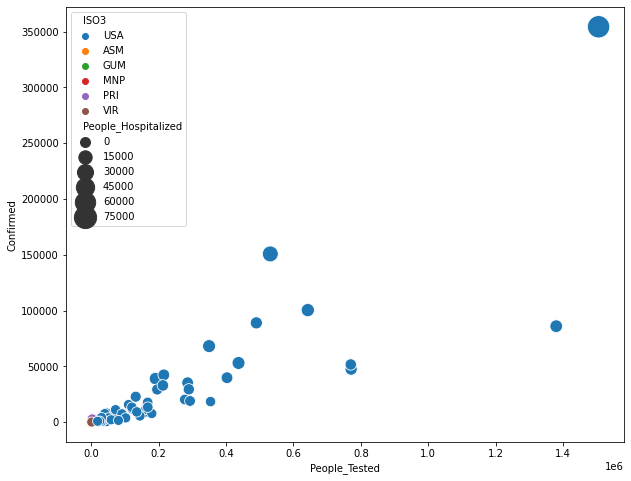

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='People_Tested',y= 'Confirmed', data=processed_data, hue = 'ISO3',size='People_Hospitalized', sizes=(100,500))

Observations:
1.

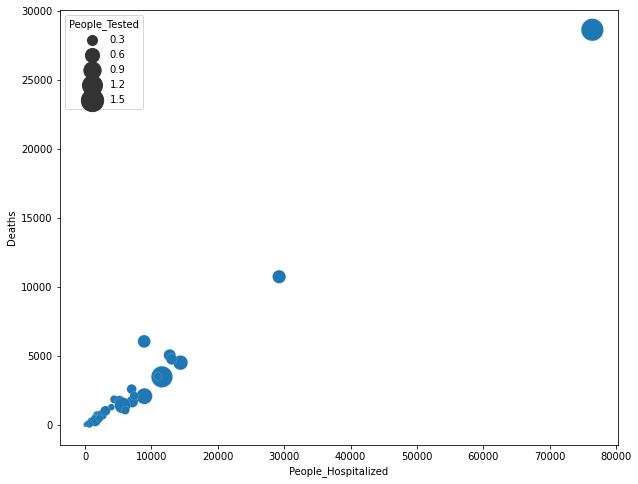

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='People_Hospitalized',y= 'Deaths', data=processed_data,size='People_Tested', sizes=(1,500))

Observations:
1. It looks like mostly severe cases are only hospitalized. Because there is a ppsitive linear relationship between Hospitalization and Deaths.

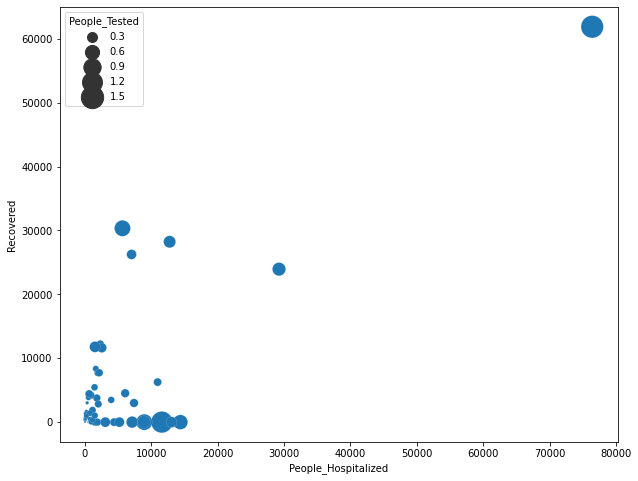

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='People_Hospitalized',y= 'Recovered', data=processed_data,size='People_Tested', sizes=(1,500))

Obsrvations:
1. There are cases where people got recovered through Hospitalization.

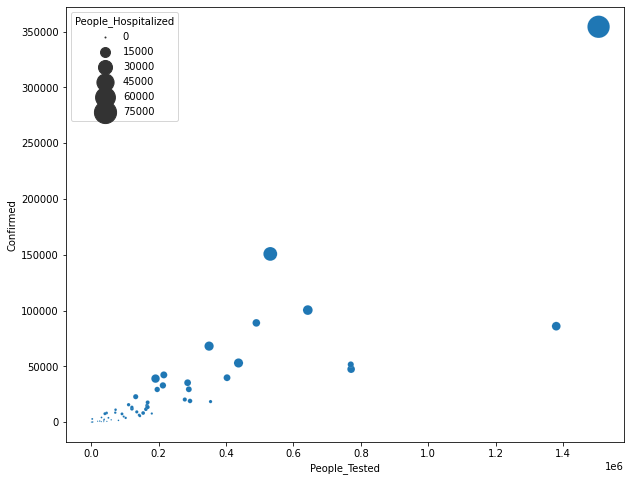

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='People_Tested',y= 'Confirmed', data=processed_data,size='People_Hospitalized', sizes=(1,500),)

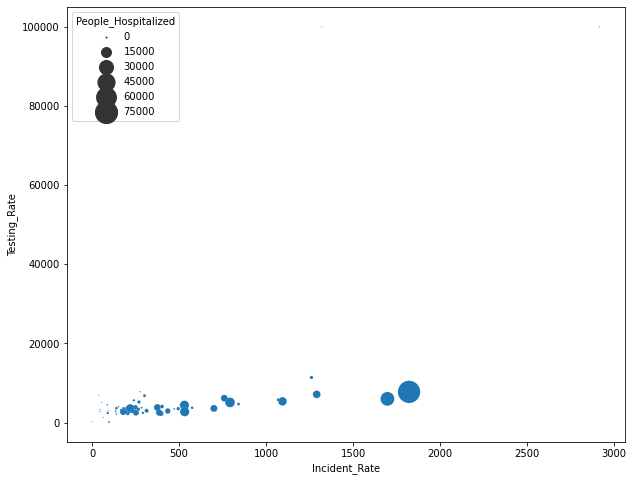

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Incident_Rate',y= 'Testing_Rate', data=processed_data,size='People_Hospitalized', sizes=(1,500))


Observations:
1. As much as the Incident Rate is increasing, the Testing_Rate doesn't seem to be increasing.
2. It does not give evidence that testing is done in the pace required to match the spread of the disease.
3. Since the testing is not done as much, more people who may not know they are infected is spreading the disease more. Contributing to the increase in the Incident_Rate in turn.

### Correlation

In [86]:
processed_data.corr().T[['Deaths']].sort_values('Deaths', ascending=False)

,Deaths
Deaths,1.000000
People_Hospitalized,0.992650
Confirmed,0.982191
Active,0.954378
Recovered,0.782292
People_Tested,0.742923
Incident_Rate,0.486559
Mortality_Rate,0.425715
Hospitalization_Rate,0.327304
UID,0.120043


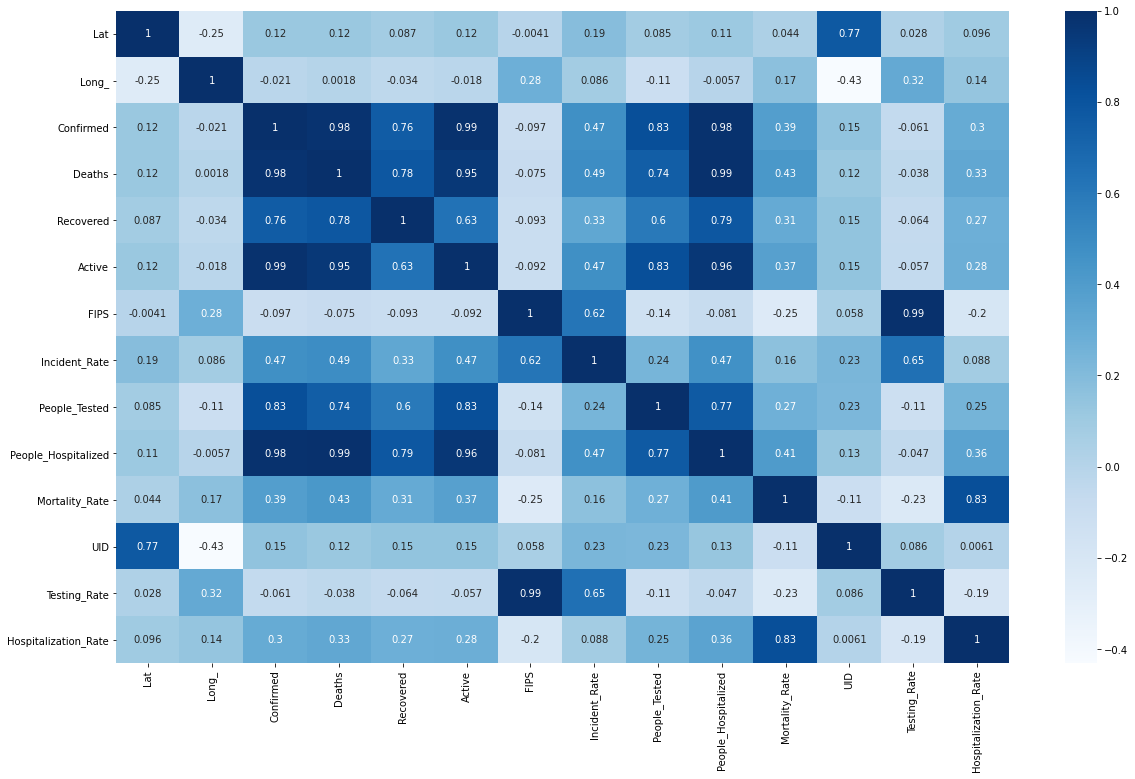

In [87]:
plt.figure(figsize=(20,12))
sns.heatmap(processed_data.corr(), annot = True, cmap = 'Blues')
plt.show()

Observations:
1. The correlation of People_Hospitalized, Active, Confirmed, Recovered and 
People_Tested are pretty strong with Deaths.
2. At the end of this notebook I will experiment the dataset with LinearRegression to see if I can take advantage of the strong correlation between some of the Features and the target variable.

In [88]:
data_new = processed_data.drop(['Country_Region','Last_Update'], axis=1)

In [89]:
data_new.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,USA,5063.940017,10.473815
2,American Samoa,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


### Outliers

Since there is only 58 records in the dataset. It does not make sense to remove any more data even if they are outliers. So I am going to keep everything.

### Feature Selectione

In [93]:
x = data_new.drop(['Deaths'], axis=1)
y= data_new['Deaths']

Encoding

In [94]:
x_enc = pd.get_dummies(x.drop(['Province_State'], axis=1), drop_first=True)
x_enc['Province_State'] = x['Province_State']
x_enc.head()

,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,ISO3_GUM,ISO3_MNP,ISO3_PRI,ISO3_USA,ISO3_VIR,Province_State
0,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,3353.942386,11.438860,0,0,0,1,0,Alabama
1,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,42.0,2.493766,84000002,5063.940017,10.473815,0,0,0,1,0,Alaska
2,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,222.857246,0.000000,0,0,0,0,0,American Samoa
3,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005,0,0,0,1,0,Arizona
4,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584,0,0,0,1,0,Arkansas


Checking skewness in data

In [95]:
x_enc.skew()

Lat                    -2.245444
Long_                   3.122144
Confirmed               4.708614
Recovered               3.649556
Active                  4.180953
FIPS                    5.269070
Incident_Rate           2.549840
People_Tested           2.814255
People_Hospitalized     5.439306
Mortality_Rate          0.400879
UID                    -3.027480
Testing_Rate            5.144724
Hospitalization_Rate    0.153123
ISO3_GUM                7.615773
ISO3_MNP                7.615773
ISO3_PRI                7.615773
ISO3_USA               -3.027483
ISO3_VIR                7.615773
dtype: float64

Observations:
1. The variables Lat, Long_, Confirmed, Recovered, Active, FIPS, Incident_Rate, People_Tested, People_Hospitalized, Testing_Rate are skewed.


### Data Transformation and Scaling

Power Transformation

In [97]:
pt_enc = PowerTransformer(standardize=False)

x_enc_pt = pt_enc.fit_transform(x_enc.drop(['Province_State','FIPS','ISO3_GUM', 'ISO3_MNP', 'ISO3_PRI', 'ISO3_USA', 'ISO3_VIR'], axis=1))

x_enc_pt = pd.DataFrame(x_enc_pt, columns=x_enc.drop(['Province_State','FIPS','ISO3_GUM', 'ISO3_MNP', 'ISO3_PRI', 'ISO3_USA', 'ISO3_VIR'], axis=1).columns)


x_enc_pt['Province_State'] = x_enc['Province_State']
x_enc_pt['FIPS'] = x_enc['FIPS']
x_enc_pt['ISO3_GUM'] = x_enc['ISO3_GUM']
x_enc_pt['ISO3_MNP'] = x_enc['ISO3_MNP']
x_enc_pt['ISO3_PRI'] = x_enc['ISO3_PRI']
x_enc_pt['ISO3_USA'] = x_enc['ISO3_USA']
x_enc_pt['ISO3_VIR'] = x_enc['ISO3_VIR']
x_enc_pt.skew()

Lat                    -0.356808
Long_                  -0.063826
Confirmed              -0.033709
Recovered              -0.210204
Active                 -0.089886
Incident_Rate           0.094166
People_Tested          -0.020884
People_Hospitalized    -0.032037
Mortality_Rate         -0.003004
UID                    -3.027480
Testing_Rate           -0.011876
Hospitalization_Rate    0.058385
FIPS                    5.269070
ISO3_GUM                7.615773
ISO3_MNP                7.615773
ISO3_PRI                7.615773
ISO3_USA               -3.027483
ISO3_VIR                7.615773
dtype: float64

MinMaxScaling

In [98]:
mn_enc = MinMaxScaler(feature_range=(0,5))

x_enc_pt_mn = mn_enc.fit_transform(x_enc_pt.drop(['Province_State','ISO3_GUM', 'ISO3_MNP', 'ISO3_PRI', 'ISO3_USA', 'ISO3_VIR'], axis=1))

x_enc_pt_mn = pd.DataFrame(x_enc_pt_mn, columns=x_enc_pt.drop(['Province_State','ISO3_GUM', 'ISO3_MNP', 'ISO3_PRI', 'ISO3_USA', 'ISO3_VIR'], axis=1).columns)


x_enc_pt_mn['Province_State'] = x_enc['Province_State']
x_enc_pt_mn['ISO3_GUM'] = x_enc['ISO3_GUM']
x_enc_pt_mn['ISO3_MNP'] = x_enc['ISO3_MNP']
x_enc_pt_mn['ISO3_PRI'] = x_enc['ISO3_PRI']
x_enc_pt_mn['ISO3_USA'] = x_enc['ISO3_USA']
x_enc_pt_mn['ISO3_VIR'] = x_enc['ISO3_VIR']
x_enc_pt_mn.head()

,Lat,Long_,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,FIPS,Province_State,ISO3_GUM,ISO3_MNP,ISO3_PRI,ISO3_USA,ISO3_VIR
0,1.793558,2.772789,2.504950,0.000000,2.839876,2.607924,2.739944,2.372954,2.479741,4.994534,2.568770,2.135230,0.00000,Alabama,0,0,0,1,0
1,5.000000,0.638180,1.077857,1.859977,0.676027,1.562687,1.754259,0.936793,1.665375,4.994534,2.865943,1.963343,0.00005,Alaska,0,0,0,1,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600564,0.000000,0.00295,American Samoa,0,0,0,0,0
3,1.918611,2.018964,2.579218,3.064646,2.736201,2.409879,2.744615,2.466752,2.985471,4.994534,2.287601,2.238688,0.00015,Arizona,0,0,0,1,0
4,2.031240,2.609982,2.018590,3.076746,1.676456,2.257904,2.346151,1.886269,1.458982,4.994535,2.532509,2.002563,0.00020,Arkansas,0,0,0,1,0


In [99]:
x_enc_pt_mn.skew()

Lat                    -0.356808
Long_                  -0.063826
Confirmed              -0.033709
Recovered              -0.210204
Active                 -0.089886
Incident_Rate           0.094166
People_Tested          -0.020884
People_Hospitalized    -0.032037
Mortality_Rate         -0.003004
UID                    -3.027480
Testing_Rate           -0.011876
Hospitalization_Rate    0.058385
FIPS                    5.269070
ISO3_GUM                7.615773
ISO3_MNP                7.615773
ISO3_PRI                7.615773
ISO3_USA               -3.027483
ISO3_VIR                7.615773
dtype: float64

### Finding Random State

In [ ]:
r_state = 0
train_score = 0
test_score = 0

for i in range(0,1000):
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_enc_pt_mn, y, test_size = 0.2, random_state = i)
  model = XGBRegressor(objective='reg:squarederror')
  model.fit(x_tr.drop(['Province_State'],axis=1), y_tr)
  y_tr_pred = model.predict(x_tr.drop(['Province_State'],axis=1))
  y_ts_pred = model.predict(x_ts.drop(['Province_State'],axis=1))
  tr_score = r2_score(y_tr, y_tr_pred)
  ts_score = r2_score(y_ts, y_ts_pred)
  if ts_score > test_score:
    if round(tr_score*100) == round(ts_score*100):
      print(round(tr_score*100), round(ts_score*100))
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train score: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,6)}")
    


100 100
random state: 663, Train score: 0.9999375692170933, test score: 0.9950503739855378
Variance: 0.004887


### Train and Test Split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_enc_pt_mn, y, test_size = 0.2, random_state = 663)


## Model Selection

In [ ]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]

for model in models:

  cv_model = cross_val_score(model, x_train.drop(['Province_State'],axis=1), y_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  print(f"Cross val score: {cv_model}")
  print(f"Mean Cross val score: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)


Model: LinearRegression
Cross val score: [-1.12129685e+07 -1.12193883e+01 -1.03169065e+00 -6.27058798e+00
 -4.72958527e+09 -9.52209552e+03 -5.58447980e+00 -1.88482772e+08
 -5.07844262e+17  4.04569277e-01]
Mean Cross val score: -5.078442664828324e+16
Variance: 2.321152140929136e+34
Model: SVR
Cross val score: [-0.24396524  0.00764817 -0.57699618 -0.20319624 -0.55301276 -0.10667725
 -0.50186139 -0.1015699  -1.64683309 -0.34848853]
Mean Cross val score: -0.427495241864677
Variance: 0.20191569478757457
Model: DecisionTreeRegressor
Cross val score: [ 0.7275926   0.58384065  0.23431009  0.85126702  0.71505854  0.31219282
  0.45899534  0.84633493 -0.98258609  0.45959423]
Mean Cross val score: 0.42066001169151307
Variance: 0.25927040634151755
Model: KNeighborsRegressor
Cross val score: [0.70606485 0.87606162 0.86064051 0.91231666 0.89938336 0.96119262
 0.47651987 0.56216801 0.08962591 0.04144782]
Mean Cross val score: 0.638542123808714
Variance: 0.10473113544156654


Observations:
1. Only KneighborsRegressor is giving a decent score.

Ensemble Techniques

In [ ]:
models = [XGBRegressor(objective='reg:squarederror'),KNeighborsRegressor(), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]

for model in models:

  cv_model = cross_val_score(model, x_train.drop(['Province_State'],axis=1), y_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross val score: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)


Model: XGBRegressor ||  Mean Cross val score: 0.662871527570436 || Variance: 0.046025644228368724
Model: KNeighborsRegressor ||  Mean Cross val score: 0.638542123808714 || Variance: 0.10473113544156654
Model: RandomForestRegressor ||  Mean Cross val score: 0.3583634550534919 || Variance: 0.7349734418214089
Model: GradientBoostingRegressor ||  Mean Cross val score: 0.4139118447322689 || Variance: 0.31718884775787315
Model: AdaBoostRegressor ||  Mean Cross val score: 0.3473907858695161 || Variance: 0.8766075272107339


Observations:
1. XGBoostRegressor, KNeighborsRegressor are giving a decent score.

### Hyper Parameter Tuning

Tuning XGBRegressor

In [108]:
learning_rate = [1.3,1,1.5,0.1,0.5,0.06,0.03]

max_depth   = [int(x) for x in np.linspace(10,110,11)]
booster = ['gbtree','gblinear']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2500, num = 11)]
max_features = ['auto','log2']
objective=['reg:squarederror']

params = {'learning_rate':learning_rate,
          'booster':booster,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'objective':objective,
          'max_features':max_features}



xgbr_model = XGBRegressor()

xgbr_modelcv = RandomizedSearchCV(xgbr_model, param_distributions=params, scoring = 'r2', cv = 10, random_state=0, verbose=10, n_iter=100, n_jobs=-1)
xgbr_modelcv.fit(x_train.drop(['Province_State'],axis=1), y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1816s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1172s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   12.6s
[Parallel(n_jo

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [1.3, 1, 1.5, 0.1, 0.5,
                                

In [109]:
print(xgbr_modelcv.best_score_)
print(xgbr_modelcv.best_params_)

0.6467628198103498
{'objective': 'reg:squarederror', 'n_estimators': 2270, 'max_features': 'auto', 'max_depth': 30, 'learning_rate': 0.1, 'booster': 'gbtree'}


In [110]:
xgbr = xgbr_modelcv.best_estimator_
xgbr.fit(x_train.drop(['Province_State'], axis=1), y_train)
xgbr_y_preds = xgbr.predict(x_test.drop(['Province_State'], axis=1))
print(f"MAE: {mean_absolute_error(y_test, xgbr_y_preds)}")
print(f"MSE: {mean_squared_error(y_test, xgbr_y_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgbr_y_preds))}")
print(f"R2 score: {r2_score(y_test, xgbr_y_preds)}")

MAE: 80.13306961456935
MSE: 13517.500900066727
RMSE: 116.26478787692655
R2 score: 0.9919185336095697


Tuning KNeighborsRegressor

In [111]:
n_neighbors = [2,3,5,7,9,11]
weights = ['uniform', 'distance']
algorithm = ['auto',  'ball_tree', 'kd_tree', 'brute']
p = [1,2]

params = {'n_neighbors':n_neighbors,
          'weights':weights,
          'algorithm': algorithm, 'p':p}



knn_modelpt = KNeighborsRegressor()

knn_modelcvpt = RandomizedSearchCV(knn_modelpt, param_distributions=params, scoring = 'r2', cv = 10, random_state=0, verbose=10, n_iter=100, n_jobs=-1)
knn_modelcvpt.fit(x_train.drop(['Province_State'],axis=1), y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0465s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0262s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0540s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0682s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1779s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 925 tasks      | elapsed:    3.0s
[Parallel(n

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring='r2', verbose=10)

In [112]:
print(knn_modelcvpt.best_score_)
print(knn_modelcvpt.best_params_)

0.8056947777049684
{'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'algorithm': 'auto'}


In [113]:
knn_model_pt = knn_modelcvpt.best_estimator_
knn_model_pt.fit(x_train.drop(['Province_State'], axis=1), y_train)
knn_model_ptpred = knn_model_pt.predict(x_test.drop(['Province_State'], axis=1))
print(f"MAE: {mean_absolute_error(y_test, knn_model_ptpred)}")
print(f"MSE: {mean_squared_error(y_test, knn_model_ptpred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, knn_model_ptpred))}")
print(f"R2 score: {r2_score(y_test, knn_model_ptpred)}")

MAE: 227.69934363525246
MSE: 220929.38922200512
RMSE: 470.03126408995934
R2 score: 0.8679168992215786


Observations:
1. Although XGBRegressor is giving an excellent Test score, the train score is very less than the test score indicating variance.
2. KNeighborRegressor is showing a good Train score as well as Test score. Hence chosing KNeighborsRegressor model.

In [114]:
knn_model_pt

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')

### Building Model Pipeline.

In [ ]:
x = data_new.drop(['Deaths'],axis=1)
y = data_new['Deaths']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 953)

creating a custom class for encoding ISO3 variable.

In [ ]:

# This class will custom transformer that will create 5 new binary columns
class ISO3Encoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['ISO3_GUM'] = (x_dataset['ISO3'] == 'GUM')*1
        x_dataset['ISO3_MNP'] = (x_dataset['ISO3'] == 'MNP')*1
        x_dataset['ISO3_PRI'] = (x_dataset['ISO3'] == 'PRI')*1
        x_dataset['ISO3_USA'] = (x_dataset['ISO3'] == 'USA')*1
        x_dataset['ISO3_VIR'] = (x_dataset['ISO3'] == 'VIR')*1
        
        return x_dataset

preprocessing pipeline

In [ ]:
#creating a pipeline for preprocessing steps
pre_process = ColumnTransformer(remainder = 'passthrough',
                                transformers =  [('drop_columns', 'drop', ['Province_State','ISO3']),
                                                 ('power_transform',PowerTransformer(standardize=False), ['Lat', 'Long_', 'Confirmed', 'Recovered', 'Active','Incident_Rate', 'People_Tested', 'People_Hospitalized','Mortality_Rate', 'UID','Testing_Rate','Hospitalization_Rate']),
                                                 ('min_max_scale',MinMaxScaler(feature_range=(0,5)),['Lat', 'Long_', 'Confirmed', 'Recovered', 'Active','FIPS','Incident_Rate', 'People_Tested', 'People_Hospitalized','Mortality_Rate', 'UID','Testing_Rate','Hospitalization_Rate']),
                                                 ])

Model pipeline

In [ ]:
#Building model pipeline
pipeline_steps = [('encode', ISO3Encoder()),
                  ('pre_process', pre_process),
                  ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=1, weights='distance'))]

model_pipeline = Pipeline(steps = pipeline_steps)

## Training with train data and verifying with test data

In [ ]:
model_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('encode', ISO3Encoder()),
                ('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_columns', 'drop',
                                                  ['Province_State', 'ISO3']),
                                                 ('power_transform',
                                                  PowerTransformer(copy=True,
                                                                   method='yeo-johnson',
                                                                   standardize=False),
                                                  ['Lat', 'Long_', 'Confirmed',
                                                   'Reco...
                                                  ['Lat', 'Long_', 'Confirmed',
                

Predicting the target variables in Trainset and Testset

In [ ]:
train_preds = model_pipeline.predict(x_train)
test_preds = model_pipeline.predict(x_test)

Verifying Train predictions

In [ ]:
print("Training Score:")
print(f"R2 score: {r2_score(y_train, train_preds)}")
print(f"MAE: {mean_absolute_error(y_train, train_preds)}")
print(f"MSE: {mean_squared_error(y_train, train_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}")

Training Score:
R2 score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


Verifying the Test predictions

In [ ]:
print("Testing Score:")
print(f"R2 score: {r2_score(y_test, test_preds)}")
print(f"MAE: {mean_absolute_error(y_test, test_preds)}")
print(f"MSE: {mean_squared_error(y_test, test_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}")

Testing Score:
R2 score: 0.8101431193040058
MAE: 451.31886462743614
MSE: 779107.5003264243
RMSE: 882.6706635696149


### Saving Model Pipeline and Predictions.

In [ ]:
predictions = pd.DataFrame(test_preds, columns=['Predictions'])
predictions['ID'] = x_test['Province_State'].values
predictions.head()

,Predictions,ID
0,4519.245996,Illinois
1,50.308291,Grand Princess
2,104.172480,Idaho
3,737.088094,Mississippi
4,238.236077,New Hampshire


In [ ]:
joblib.dump(model_pipeline,'/content/covid_model_pipeline.obj')

['/content/covid_model_pipeline.obj']

In [ ]:
predictions.to_csv('/content/predictions.csv',sep=',')

Although the above model or process is giving good result, There a considerable variance in the model the train and test dataset performance

Since there is high correlation of certain variables with the target variable Deaths, I am going to do the following process to take advantage of the correlationship between certain features and the target variable.

## Linear Model without Data transformation or scaling

### Correlation

In [168]:
data_new.corr().T[['Deaths']].sort_values('Deaths', ascending=False)

,Deaths
Deaths,1.000000
People_Hospitalized,0.992650
Confirmed,0.982191
Active,0.954378
Recovered,0.782292
People_Tested,0.742923
Incident_Rate,0.486559
Mortality_Rate,0.425715
Hospitalization_Rate,0.327304
UID,0.120043


Observations:
1. Notice the correlation of 'Deaths' variable with the features 'People_Hospitalized','Confirmed','Active','Recovered','People_Tested','Incident_Rate','Mortality_Rate','Hospitalization_Rate'

### Feature Selection

In [180]:
new_data = data_new[['Province_State','People_Hospitalized','Confirmed','Active','Recovered','People_Tested','Deaths']].copy()
new_data.head()

,Province_State,People_Hospitalized,Confirmed,Active,Recovered,People_Tested,Deaths
0,Alabama,1493.0,13052,12530.0,0.0,164450.0,522
1,Alaska,42.0,401,39.0,352.0,37045.0,10
2,American Samoa,0.0,0,0.0,0.0,124.0,0
3,Arizona,1792.0,14906,10386.0,3773.0,165435.0,747
4,Arkansas,535.0,5003,1044.0,3852.0,96258.0,107


Notice that all these values are in similar scale. Hence I am not going to scale the data.

In [181]:
a = new_data.drop(['Deaths'], axis=1)
b = new_data['Deaths']

### Finding Random State

In [182]:
r_state = 0
train_score = 0
test_score = 0

for i in range(0,1000):
  x_tr, x_ts, y_tr, y_ts = train_test_split(a, b, test_size = 0.2, random_state = i)
  model = LinearRegression()
  model.fit(x_tr.drop(['Province_State'],axis=1), y_tr)
  y_tr_pred = model.predict(x_tr.drop(['Province_State'],axis=1))
  y_ts_pred = model.predict(x_ts.drop(['Province_State'],axis=1))
  tr_score = r2_score(y_tr, y_tr_pred)
  ts_score = r2_score(y_ts, y_ts_pred)
  if ts_score > test_score:
    if round(tr_score*100,3) == round(ts_score*100,3):
      print(round(tr_score*100), round(ts_score*100))
      train_score = tr_score
      test_score = ts_score
      r_state = i

print(f"random state: {r_state}, Train score: {train_score}, test score: {test_score}")
print(f"Variance: {round(train_score - test_score,6)}")
    


100 100
random state: 0, Train score: 1.0, test score: 1.0
Variance: 0.0


Observations;
1. Optimum random state is at 0

### Train and Test Split

In [184]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 0)


## Model Selection

In [186]:
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]

for model in models:

  cv_model = cross_val_score(model, a_train.drop(['Province_State'],axis=1), b_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  print(f"Cross val score: {cv_model}")
  print(f"Mean Cross val score: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)


Model: LinearRegression
Cross val score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Cross val score: 1.0
Variance: 0.0
Model: SVR
Cross val score: [-0.51882486 -0.18452978 -0.42022323 -0.23312668 -0.48532055 -0.1226077
 -1.29854552 -0.32237137 -0.36620928 -0.00423985]
Mean Cross val score: -0.3955998828290981
Variance: 0.11440130872657686
Model: DecisionTreeRegressor
Cross val score: [ 0.86973196  0.75390418  0.97953041  0.98130533  0.52942869  0.99433115
  0.93017411  0.03584398  0.96990844 -0.69754844]
Mean Cross val score: 0.634660979909072
Variance: 0.27820936124936846
Model: KNeighborsRegressor
Cross val score: [-1.94970522e-01  4.01827521e-01  6.86216381e-01 -3.67896784e+00
  6.08560492e-01  5.73681076e-01 -1.17046755e+00  2.89113238e-03
  7.08938464e-01  4.39155622e-01]
Mean Cross val score: -0.16231352266741067
Variance: 1.670662927140111


Observations:
1. Notice that the LinearRegression model is giving a Excellent score. This is due to the excellent correlation between features selected and the target.

Ensemble Techniques

In [188]:
models = [XGBRegressor(objective='reg:squarederror'),LinearRegression(), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]

for model in models:

  cv_model = cross_val_score(model, a_train.drop(['Province_State'],axis=1), b_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross val score: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)


Model: XGBRegressor ||  Mean Cross val score: 0.6462723933775488 || Variance: 0.10766185603618098
Model: LinearRegression ||  Mean Cross val score: 1.0 || Variance: 0.0
Model: RandomForestRegressor ||  Mean Cross val score: 0.37312899474884054 || Variance: 0.713384759241908
Model: GradientBoostingRegressor ||  Mean Cross val score: 0.5915323584568049 || Variance: 0.21798159575802192
Model: AdaBoostRegressor ||  Mean Cross val score: 0.6164679731491869 || Variance: 0.10408651935672245


Observations:
1. XGBoostRegressor is giving a decent score whereas LinearRegression is giving a full score.

### Hyper Parameter Tuning

Tuning XGBRegressor

In [191]:
learning_rate = [1.3,1,1.5,0.1,0.5,0.06,0.03]

max_depth   = [int(x) for x in np.linspace(10,110,11)]
booster = ['gbtree','gblinear']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2500, num = 11)]
max_features = ['auto','log2']
objective=['reg:squarederror']

params = {'learning_rate':learning_rate,
          'booster':booster,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'objective':objective,
          'max_features':max_features}



xgbr_model = XGBRegressor()

xgbr_modelcv = RandomizedSearchCV(xgbr_model, param_distributions=params, scoring = 'r2', cv = 10, random_state=0, verbose=10, n_iter=100, n_jobs=-1)
xgbr_modelcv.fit(a_train.drop(['Province_State'],axis=1), b_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1973s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1932s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   12.5s
[Parallel(n_jo

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [1.3, 1, 1.5, 0.1, 0.5,
                                

In [192]:
print(xgbr_modelcv.best_score_)
print(xgbr_modelcv.best_params_)

0.8357891975768139
{'objective': 'reg:squarederror', 'n_estimators': 2270, 'max_features': 'auto', 'max_depth': 110, 'learning_rate': 1.5, 'booster': 'gblinear'}


In [193]:
xgbr = xgbr_modelcv.best_estimator_
xgbr.fit(a_train.drop(['Province_State'], axis=1), b_train)
xgbr_y_preds = xgbr.predict(a_test.drop(['Province_State'], axis=1))
print("Testing score for XGB Regressor")
print(f"MAE: {mean_absolute_error(b_test, xgbr_y_preds)}")
print(f"MSE: {mean_squared_error(b_test, xgbr_y_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(b_test, xgbr_y_preds))}")
print(f"R2 score: {r2_score(b_test, xgbr_y_preds)}")

Testing score for XGB Regressor
MAE: 88.42625681559245
MSE: 21604.15768027581
RMSE: 146.9835286019349
R2 score: 0.9974180197624719


Observations:
1. XGBoostRegressor is giving train score of 0.87 and test score of 0.996.

In [194]:
xgbr

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.5, max_delta_step=0,
             max_depth=110, max_features='auto', min_child_weight=1,
             missing=None, n_estimators=2270, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

Tuning LinearRegression

In [195]:
fit_intercept = [True, False]
normalize = [True, False]
copy_X = [True, False]

params = {'fit_intercept':fit_intercept,
          'normalize':normalize,
          'copy_X': copy_X}



linear_model = LinearRegression()

linear_modelcv = RandomizedSearchCV(linear_model, param_distributions=params, scoring = 'r2', cv = 10, random_state=0, verbose=10, n_iter=100, n_jobs=-1)
linear_modelcv.fit(a_train.drop(['Province_State'],axis=1), b_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0133s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0266s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0504s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0746s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring='r2', verbose=10)

In [196]:
print(linear_modelcv.best_score_)
print(linear_modelcv.best_params_)

1.0
{'normalize': True, 'fit_intercept': True, 'copy_X': True}


In [197]:
linear_model_cv = linear_modelcv.best_estimator_
linear_model_cv.fit(a_train.drop(['Province_State'], axis=1), b_train)
linear_test_preds = linear_model_cv.predict(a_test.drop(['Province_State'], axis=1))
print("Linear Regression's Testing set scores:")
print(f"MAE: {mean_absolute_error(b_test, linear_test_preds)}")
print(f"MSE: {mean_squared_error(b_test, linear_test_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(b_test, linear_test_preds))}")
print(f"R2 score: {r2_score(b_test, linear_test_preds)}")

Linear Regression's Testing set scores:
MAE: 2.1400362963201285e-11
MSE: 7.48135201578879e-22
RMSE: 2.7352060280331333e-11
R2 score: 1.0


Observations:
1. Linear Regression is 1.0 score for both test and train datasets.
2. Need to make sure that the model is performing well using Cross validation to avoid overfitting or underfitting.

In [198]:
linear_model_cv

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Cross validating to elliminate Underfitting or Over fitting

Cross validate using Only Train data

In [200]:
models = [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
          XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.5, max_delta_step=0,
             max_depth=110, max_features='auto', min_child_weight=1,
             missing=None, n_estimators=2270, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)]

for model in models:
  cv_model = cross_validate(model, a_train.drop(['Province_State'], axis=1), b_train, scoring = ['r2','neg_mean_squared_error'], cv=20, n_jobs= -1,)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross val R2 score: {cv_model['test_r2'].mean()} || Variance R2 score {cv_model['test_r2'].var()} ||  Mean Cross MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print("="*50)

Model: LinearRegression ||  Mean Cross val R2 score: 1.0 || Variance R2 score 0.0 ||  Mean Cross MSE: 7.176868812962075e-22 || Variance MSE 2.6487379323502448e-42
Model: XGBRegressor ||  Mean Cross val R2 score: -204.56114936848624 || Variance R2 score 640448.2885144452 ||  Mean Cross MSE: 390294.5686615509 || Variance MSE 1533875487158.9468


Observations:
1. Linear Regression is still performing very well.
2. XGBoostRegressor failed the cross validation.

Cross validation using the Whole data

In [201]:
models = [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
          XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.5, max_delta_step=0,
             max_depth=110, max_features='auto', min_child_weight=1,
             missing=None, n_estimators=2270, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)]

for model in models:
  cv_model = cross_validate(model, a.drop(['Province_State'], axis=1), b, scoring = ['r2','neg_mean_squared_error'], cv=20, n_jobs= -1,)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross val R2 score: {cv_model['test_r2'].mean()} || Variance R2 score {cv_model['test_r2'].var()} ||  Mean Cross MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print("="*50)

Model: LinearRegression ||  Mean Cross val R2 score: 1.0 || Variance R2 score 0.0 ||  Mean Cross MSE: 1.3865505163620814e-22 || Variance MSE 6.332015874949783e-44
Model: XGBRegressor ||  Mean Cross val R2 score: 0.7944500361771236 || Variance R2 score 0.09407453295690377 ||  Mean Cross MSE: 208556.94263543395 || Variance MSE 414264887556.4714


Observations:
1. Linear model is still performing very well with the whole data also.
2. XGBoostRegressor is giving a decent score.

#### I am choosing Linear model for building pipeline since its performing well on train set, test set and even in Cross Validation.

### Building Linear Model Pipeline.

In [204]:
x = data_new.drop(['Deaths'],axis=1)
y = data_new['Deaths']

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [206]:
data_new.columns

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

preprocessing pipeline

In [207]:
#creating a pipeline for preprocessing steps
pre_process_1 = ColumnTransformer(remainder = 'passthrough',
                                transformers =  [('drop_columns', 'drop', ['Province_State','Lat', 'Long_','FIPS', 'UID','ISO3','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate'])])

Model pipeline

In [208]:
#Building model pipeline
pipeline_steps_1 = [('pre_process', pre_process),
                  ('linear_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))]

linear_model_pipeline = Pipeline(steps = pipeline_steps_1)

## Final Training and Testing of the model pipeline

In [209]:
linear_model_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_columns', 'drop',
                                                  ['Province_State', 'Lat',
                                                   'Long_', 'FIPS', 'UID',
                                                   'ISO3'])],
                                   verbose=False)),
                ('linear_model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

Predicting the target variables in Trainset and Testset

In [210]:
train_preds = linear_model_pipeline.predict(x_train)
test_preds = linear_model_pipeline.predict(x_test)

Verifying Train predictions

In [211]:
print("Training Score:")
print(f"R2 score: {r2_score(y_train, train_preds)}")
print(f"MAE: {mean_absolute_error(y_train, train_preds)}")
print(f"MSE: {mean_squared_error(y_train, train_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}")

Training Score:
R2 score: 1.0
MAE: 1.3027608291782484e-11
MSE: 3.122102965810374e-22
RMSE: 1.7669473579624194e-11


Verifying the Test predictions

In [212]:
print("Testing Score:")
print(f"R2 score: {r2_score(y_test, test_preds)}")
print(f"MAE: {mean_absolute_error(y_test, test_preds)}")
print(f"MSE: {mean_squared_error(y_test, test_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}")

Testing Score:
R2 score: 1.0
MAE: 1.3181651501439861e-11
MSE: 3.385331040473657e-22
RMSE: 1.839926911720587e-11


In [213]:
linear_model_pipeline

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_columns', 'drop',
                                                  ['Province_State', 'Lat',
                                                   'Long_', 'FIPS', 'UID',
                                                   'ISO3'])],
                                   verbose=False)),
                ('linear_model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

### Cross validating the Linear Model Pipeline

In [214]:
cv_model_train = cross_validate(linear_model_pipeline, x_train, y_train, scoring = ['r2','neg_mean_squared_error'], cv=20, n_jobs= -1,)
print("Cross Validation of the Linear Model Pipeline using Train data")
print(f"Mean Cross val R2 score: {cv_model_train['test_r2'].mean()} || Variance R2 score {cv_model_train['test_r2'].var()}")
print(f"Mean Cross MSE: {(cv_model_train['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model_train['test_neg_mean_squared_error']*(-1)).var()}")
print(f"Mean Cross RMSE: {np.sqrt(cv_model_train['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {np.sqrt(cv_model_train['test_neg_mean_squared_error']*(-1)).var()}")
print("="*50)

Cross Validation of the Linear Model Pipeline using Train data
Mean Cross val R2 score: 1.0 || Variance R2 score 0.0
Mean Cross MSE: 5.1763677873853165e-22 || Variance MSE 5.1772380296995516e-43
Mean Cross RMSE: 1.745402847472759e-11 || Variance MSE 2.1299366874193012e-22


In [215]:
cv_model_full = cross_validate(linear_model_pipeline, x, y, scoring = ['r2','neg_mean_squared_error'], cv=20, n_jobs= -1,)
print("Cross Validation of the Linear Model Pipeline using whole dataset")
print(f"Mean Cross val R2 score: {cv_model_full['test_r2'].mean()} || Variance R2 score {cv_model_full['test_r2'].var()}")
print(f"Mean Cross MSE: {(cv_model_full['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model_full['test_neg_mean_squared_error']*(-1)).var()}")
print(f"Mean Cross RMSE: {np.sqrt(cv_model_full['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {np.sqrt(cv_model_full['test_neg_mean_squared_error']*(-1)).var()}")
print("="*50)

Cross Validation of the Linear Model Pipeline using whole dataset
Mean Cross val R2 score: 1.0 || Variance R2 score 0.0
Mean Cross MSE: 6.052527657537384e-22 || Variance MSE 1.0939343599397397e-42
Mean Cross RMSE: 1.826224588152179e-11 || Variance MSE 2.7174314111657896e-22


Observations:
1. The linear Model Pipeline is giving an excellent performance in Cross Validations.

### Saving the Linear Model Pipeline and Predictions.

In [216]:
linear_predictions = pd.DataFrame(test_preds, columns=['Predictions'])
linear_predictions['ID'] = x_test['Province_State'].values
linear_predictions.head()

,Predictions,ID
0,283.0,New Mexico
1,10749.0,New Jersey
2,144.0,Oregon
3,786.0,Minnesota
4,2096.0,Florida


In [217]:
joblib.dump(linear_model_pipeline,'/content/covid_linear_model_pipeline.obj')

['/content/covid_linear_model_pipeline.obj']

In [218]:
linear_predictions.to_csv('/content/linear_predictions.csv',sep=',')

# Conclusion:
1. The Linear Model Pipeline is performing very well for the given data that we have.
2. It performed well in Cross validations, train set as well as testsets(data that it has not seen)
3. Hence the Final model to be used for production will be the Linear Model Pipeline.